In [1]:
import os
CURDIR = os.getcwd().split("\\")
if "notebooks" in CURDIR:
    n = len(CURDIR) - CURDIR.index("notebooks")
    os.chdir(os.getcwd() + ("\\.." * n))

In [13]:
from typing import Union, Callable

import numpy as np
import pandas as pd
import seaborn.objects as so
from matplotlib.ticker import FuncFormatter


class BarPlot:
    """
    high level function to quickly create seaborn barplot
    uses the seaborn.objects interface internally to enable additional modification after creation
    https://seaborn.pydata.org/tutorial/objects_interface.html
    """

    def __init__(
        self,
        df: pd.DataFrame,
        x: str,
        y: str,
        col: Union[None, str] = None,
        text: Union[None, str] = None,
        stacked: bool = True,
        labels: bool = True,
        label_type: str = "absolute",
        digits: int = 2,
        bar_width: float = 0.8,
        theme_fun: Union[None, Callable] = None
    ):
        """
        Args:
        df: a pandas dataframe
        x: variable to plot on the x axis
        y: variable to plot on the y axis
        col: optional color asthetic to color the bar segments based on another variable
        text: variable on which different labels are based, should be numeric to enable np.round
        stacked: boolean to indicate whether to use stacked barplots as opposed to dodged barplots
        labels: boolean to indicate whether to add labels
        label_type: should be either absolute or percent, percent transform a proportion to percent and adjusts the y axis appropriately
        digits: number of digits to round to, relevant for labels
        bar_width: should not be changed for the labeled version, but controls the barwidths
        """
        self.df = df
        self.plot_data = None
        self.p = None
        self.x = x
        self.y = y
        self.col = col
        self.text = text if text is not None else y
        self.stacked = stacked
        self.labels = labels
        self.label_type = label_type
        self.digits = digits
        self.bar_width = bar_width
        self.theme_fun = theme_fun
    def _prepare_data(self):
        self.plot_data = self.df.copy()
        self.plot_data = self.plot_data.groupby(self.x, group_keys=True).apply(
            lambda grp: grp.assign(label_pos=lambda x: np.cumsum(x[self.y]) - x[self.y] / 2)
        )
        if self.labels and self.label_type == "percent":
            if self.digits == 0:
                self.plot_data = self.plot_data.assign(
                    label=lambda x: np.round(x[self.text] * 100, self.digits).astype("int").astype("string") + " %"
                )
            else:
                self.plot_data = self.plot_data.assign(
                    label=lambda x: np.round(x[self.text] * 100, self.digits).astype("string") + " %"
                )
        else:
            self.plot_data = self.plot_data.assign(label=lambda x: np.round(x[self.text], self.digits))

    def _prepare_plot(self):
        if self.col is not None:
            if self.stacked:
                self.p = so.Plot(self.plot_data, x=self.x, y=self.y, color=self.col).add(so.Bar(), so.Stack())
            else:
                self.p = so.Plot(self.plot_data, x=self.x, y=self.y, color=self.col).add(
                    so.Bar(width=self.bar_width), so.Dodge()
                )

        else:
            self.p = so.Plot(self.plot_data, x=self.x, y=self.y).add(so.Bar())

    def _add_labels(self):
        if self.labels and self.col is not None and self.x != self.col:
            if self.stacked:
                self.p = self.p.add(so.Text(color="black"), text="label", x=self.x, y="label_pos", color=self.col)
            else:
                self.p = self.p.add(so.Text(color="black", valign="bottom"), so.Dodge(by=[self.col]), text="label")
        elif self.labels and self.col is None:
            self.p = self.p.add(so.Text(valign="bottom", color="black"), text="label")
        elif self.x == self.col:
            self.p = self.p.add(so.Text(valign="bottom", color="black"), text="label")

    def plot(self, width: int = 10, height: int = 6):
        """
        Args:
        width: width of the plot
        height: height of the plot
        """
        self._prepare_data()
        self._prepare_plot()
        self._add_labels()
        if self.theme_fun is not None:
            self.p = self.theme_fun(self.p)
        if self.label_type == "percent":
            formatter = FuncFormatter(lambda x, pos: "${:.0f}$ %".format(np.round(x * 100, 0)))
            self.p = self.p.scale(y=so.Continuous().label(formatter=formatter))
        return self.p.layout(size=(width, height))

In [15]:
from prep import * 
import seaborn as sns
import seaborn.objects as so
diamonds = sns.load_dataset("diamonds")
tab = prep_freq_table(diamonds, ["cut","color"])

def themer(p):
    return p.scale(color="tab10").label(y="Counts")

example_plot = BarPlot(
    df=tab,
    x="cut",
    col="color",
    y="counts",
    theme_fun=themer
)
example_plot2 = so.Plot(
    tab,
    x="cut",
    color="color",
    y="counts"
).add(so.Bars())

In [18]:
from reporter.utils import DataPlot

In [19]:
p = DataPlot(example_plot, height=6,width=10)

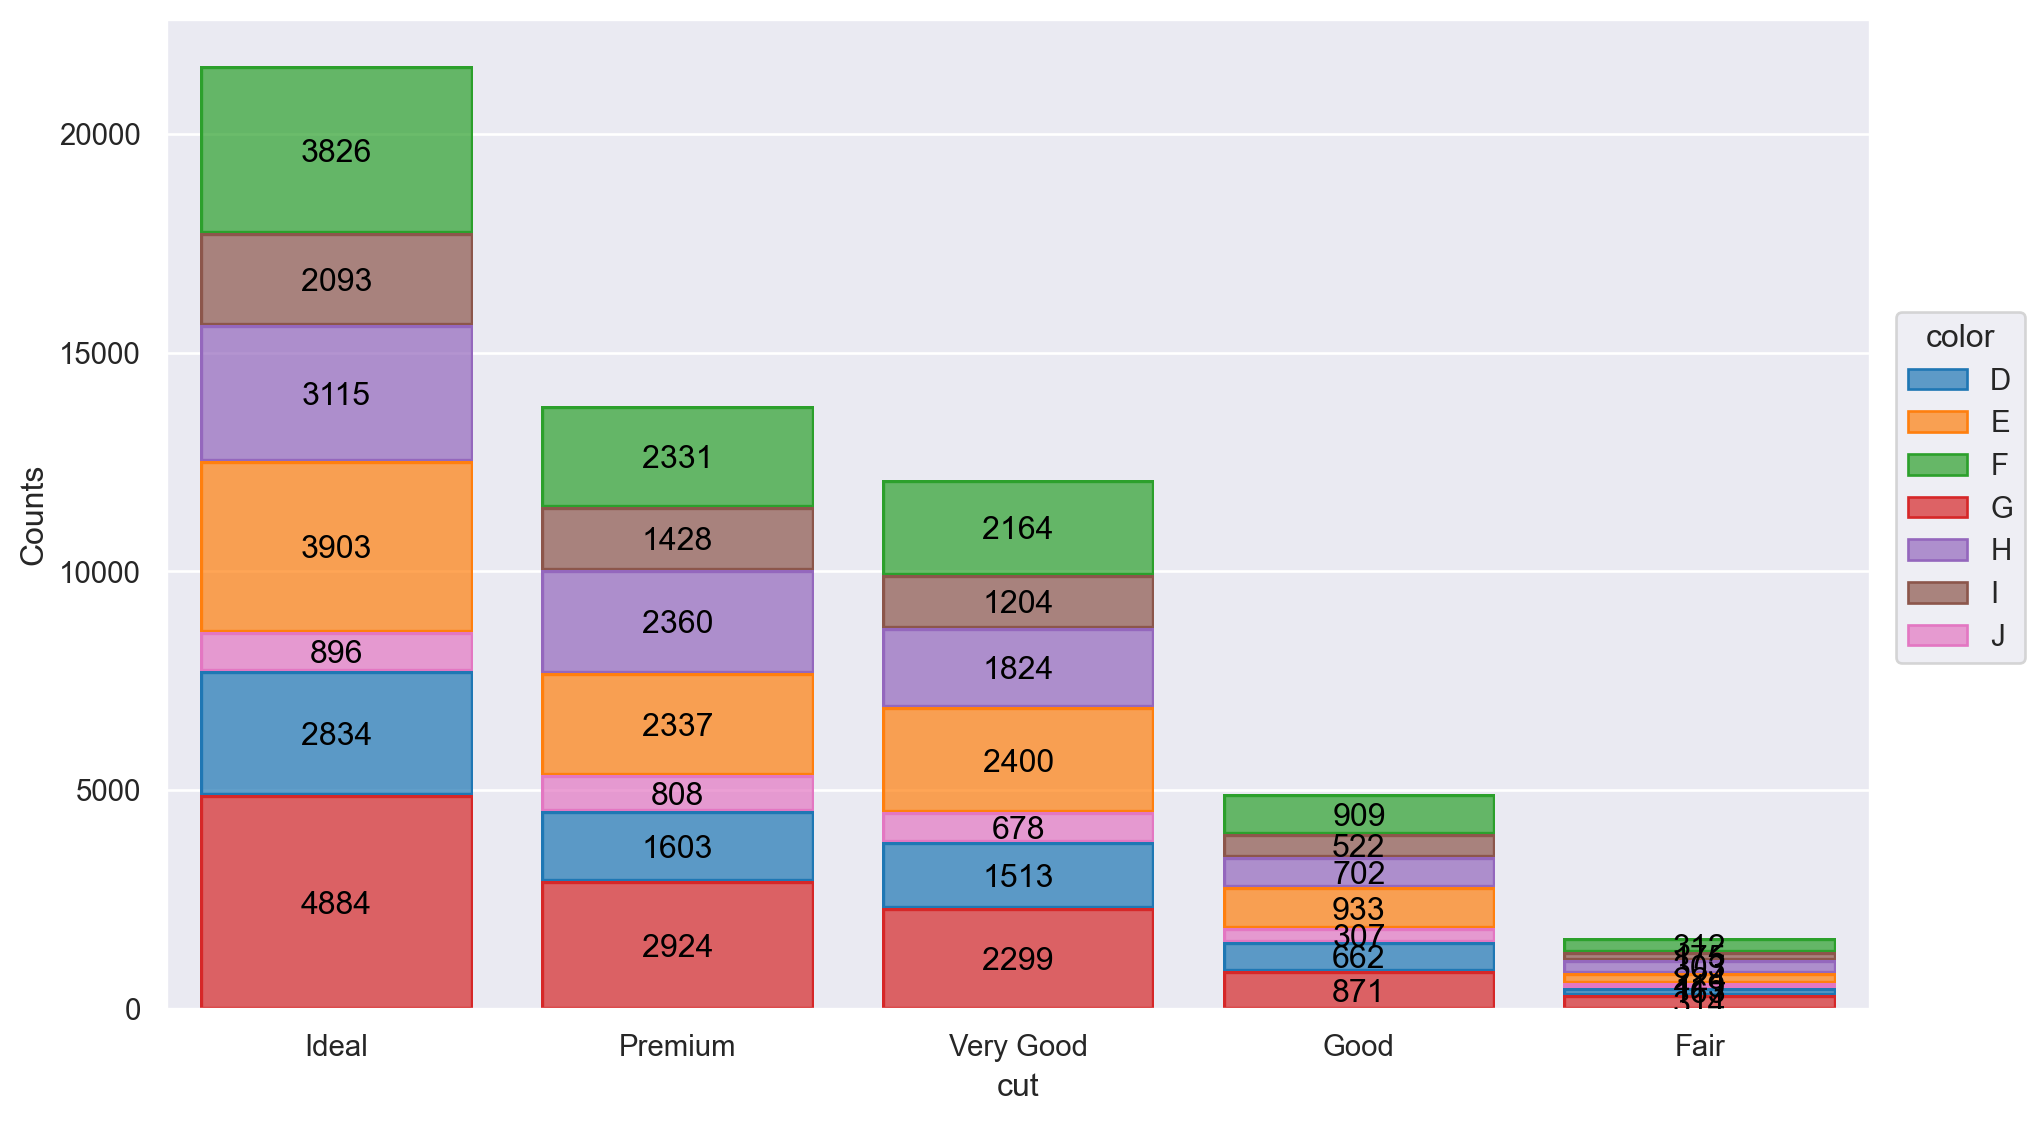

In [22]:
p.load().plot()

In [38]:
import subprocess
import threading
def timeout(seconds=5):
    process2 = subprocess.Popen(['timeout',"5"],
                    stdin =subprocess.PIPE,
                    stderr =subprocess.PIPE,
                    stdout=subprocess.PIPE,
                    universal_newlines=True,
                    shell=True) 
    print(''.join(process2.stdout.readlines()))
    print(''.join(process2.stderr.readlines()))
    process = subprocess.Popen(['dir'],
                    stdin =subprocess.PIPE,
                    stderr =subprocess.PIPE,
                    stdout=subprocess.PIPE,
                    universal_newlines=True,
                    shell=True) 
    print(''.join(process.stdout.readlines()))
    print(''.join(process.stderr.readlines()))
x = threading.Thread(target=timeout, args=(5,))
x.start()


Try 'timeout --help' for more information.

 Datentr„ger in Laufwerk C: ist W0195N3553-C
 Volumeseriennummer: 7873-00E8

 Verzeichnis von c:\Users\u890640\Documents\Python Pakete\reporter

09.10.2023  15:54    <DIR>          .
09.10.2023  15:54    <DIR>          ..
09.10.2023  13:04    <DIR>          .venv
09.10.2023  12:54    <DIR>          notebooks
09.10.2023  13:07           201.266 poetry.lock
09.10.2023  13:11               734 pyproject.toml
09.10.2023  16:52                19 README.md
10.10.2023  11:00    <DIR>          reporter
               3 Datei(en),        202.019 Bytes
               5 Verzeichnis(se), 912.015.900.672 Bytes frei




In [16]:
timeout --help

TypeError: bad operand type for unary -: '_Helper'

In [2]:
from visualize import *
from prep import *
import seaborn as sns

In [3]:
diamonds = sns.load_dataset("diamonds")

In [4]:
tab = prep_freq_table(diamonds, "cut").to_pandas()


In [5]:
tab

,cut,count,proportion
0,Good,4906,0.090953
1,Premium,13791,0.255673
2,Fair,1610,0.029848
3,Ideal,21551,0.399537
4,Very Good,12082,0.223990


In [11]:
import pandas as pd
p = BarPlot(tab,x="cut",y="count")
from reporter.utils import DataPlot
plot = DataPlot(p)
plot.create()

"with open(r'C:\\Users\\u890640\\AppData\\Roaming\\reporter\\svgualjqlb.pkl','rb') as fid:\n    p = pickle.load(fid)\np.plot(10, 6)\n"

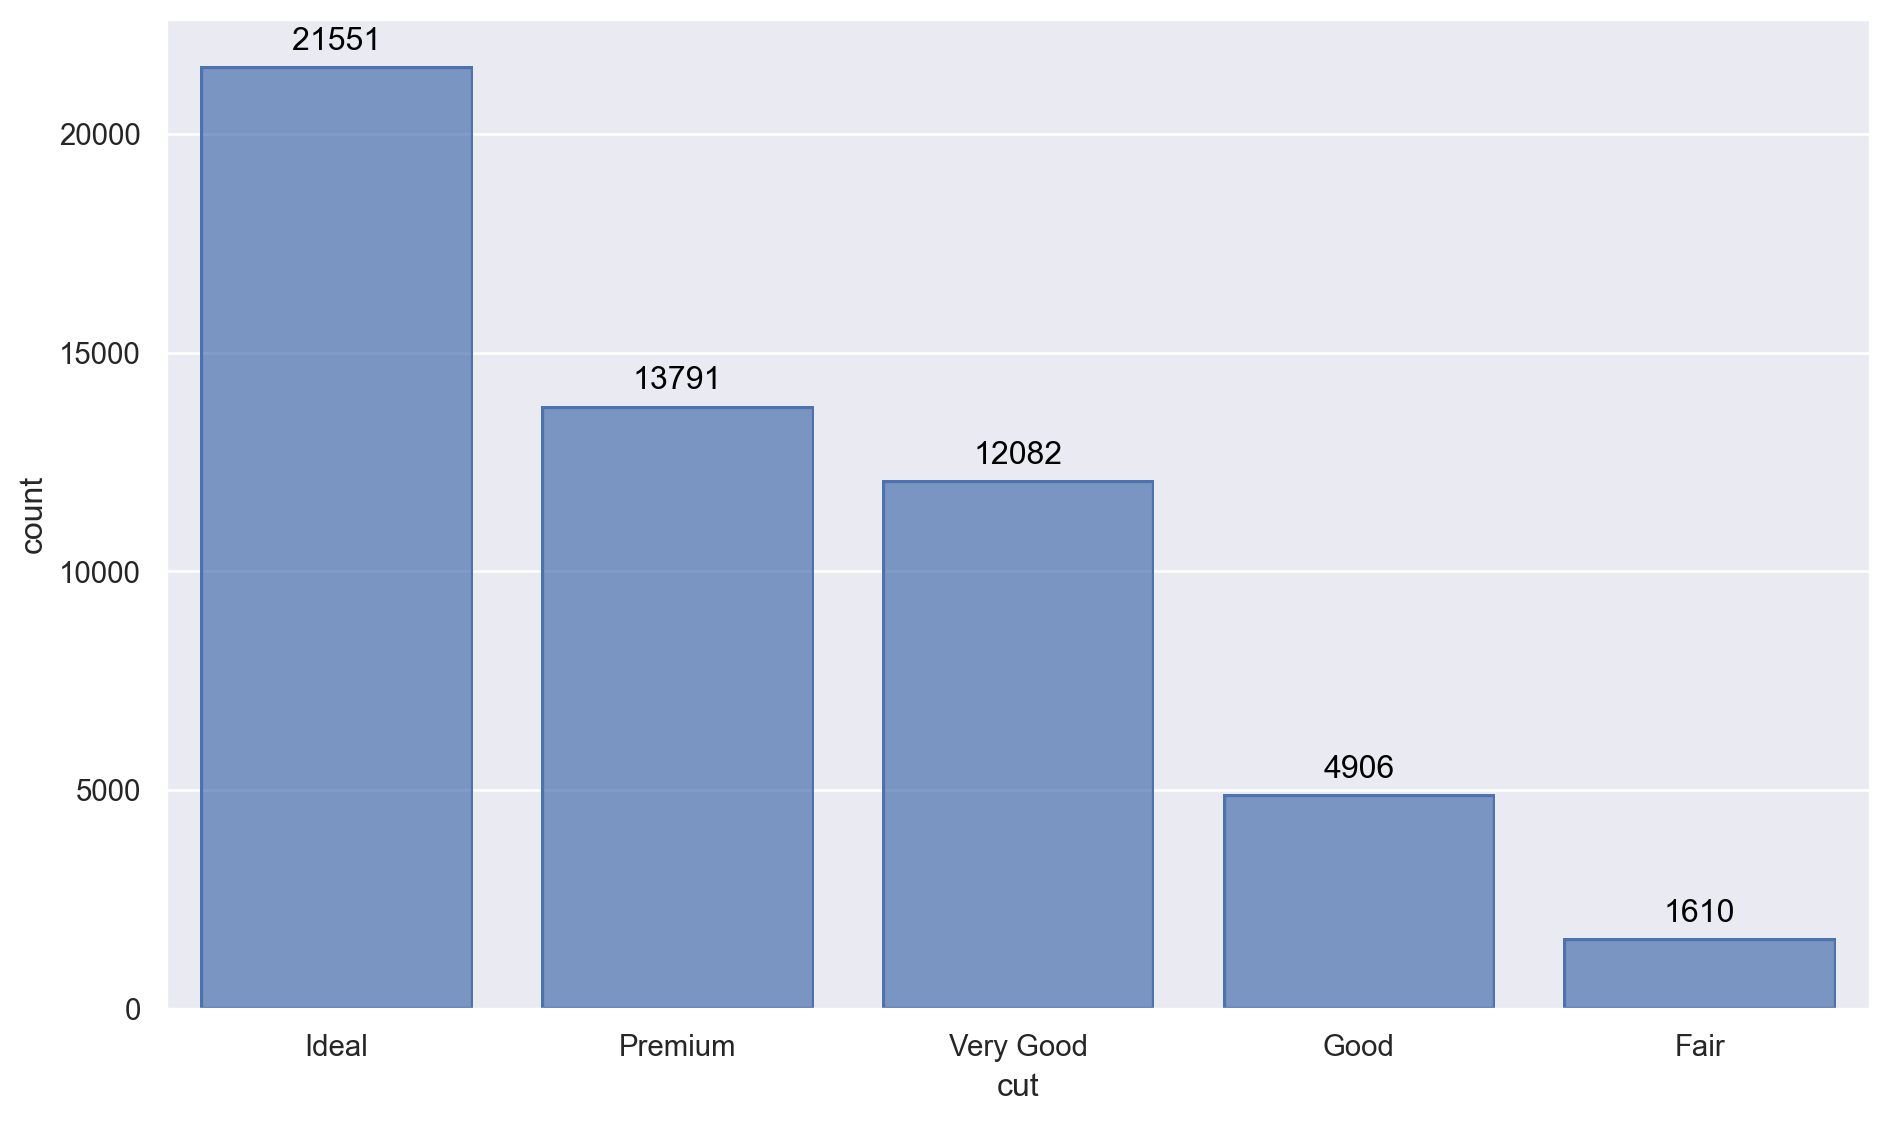

In [8]:
plot.plot()